<a href="https://colab.research.google.com/github/kartheek453/Sales-prediction/blob/main/Salespredicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# Sample data
data = {
    'Store': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'DayOfWeek': [5, 5, 5, 5, 5, 4, 4, 4, 4, 4],
    'Customers': [555, 625, 821, 148, 720, 555, 625, 821, 148, 720],
    'Open': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Promo': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'StateHoliday': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'SchoolHoliday': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Sales': [5263, 6064, 8314, 13995, 4822, 5020, 6080, 7890, 14437, 4711]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('sales_data.csv', index=False)


In [3]:
# Load the dataset
data = pd.read_csv('sales_data.csv')

# Display the first few rows
data.head()


,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,1,5,555,1,1,0,1,5263
1,2,5,625,1,1,0,1,6064
2,3,5,821,1,1,0,1,8314
3,4,5,148,1,1,0,1,13995
4,5,5,720,1,1,0,1,4822


Store            0
DayOfWeek        0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Sales            0
dtype: int64
           Store  DayOfWeek   Customers  Open  Promo  StateHoliday  \
count  10.000000  10.000000   10.000000  10.0   10.0          10.0   
mean    3.000000   4.500000  573.800000   1.0    1.0           0.0   
std     1.490712   0.527046  243.476122   0.0    0.0           0.0   
min     1.000000   4.000000  148.000000   1.0    1.0           0.0   
25%     2.000000   4.000000  555.000000   1.0    1.0           0.0   
50%     3.000000   4.500000  625.000000   1.0    1.0           0.0   
75%     4.000000   5.000000  720.000000   1.0    1.0           0.0   
max     5.000000   5.000000  821.000000   1.0    1.0           0.0   

       SchoolHoliday         Sales  
count           10.0     10.000000  
mean             1.0   7659.600000  
std              0.0   3667.427776  
min              1.0   4711.000000  
25%              1.

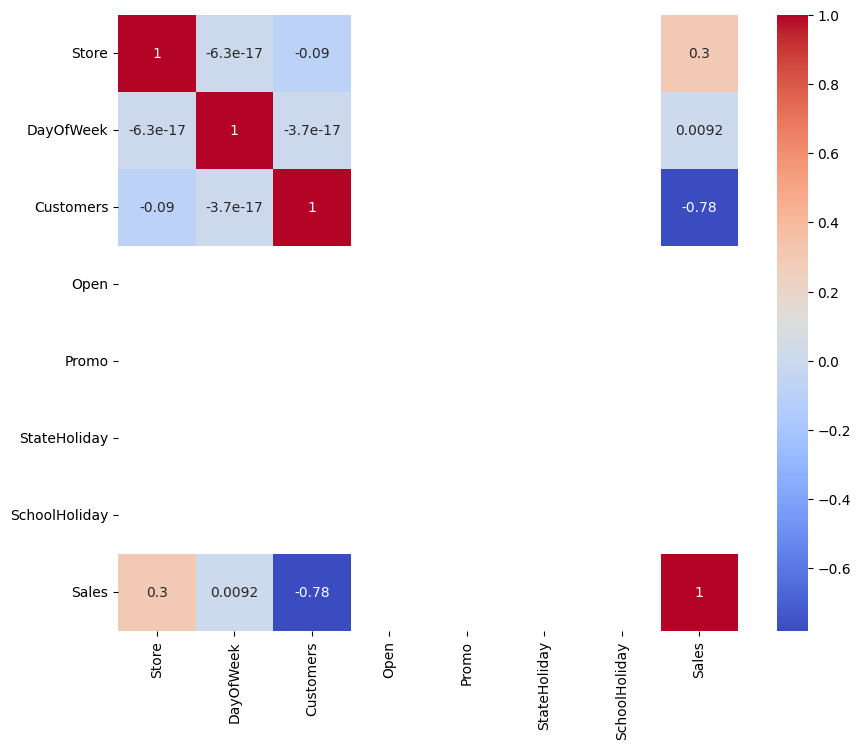

In [4]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [5]:
# Fill missing values (example: fill with mean)
data.fillna(data.mean(), inplace=True)

# Encode categorical variables (if any)
data = pd.get_dummies(data, drop_first=True)

# Split the data into features and target
X = data.drop('Sales', axis=1)  # Assuming 'Sales' is the target column
Y = data['Sales']


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [7]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [8]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [9]:
# Make predictions on the test set
Y_pred = model.predict(X_test)


Mean Squared Error: 8772618.885850001
R2 Score: 0.49947350513526223


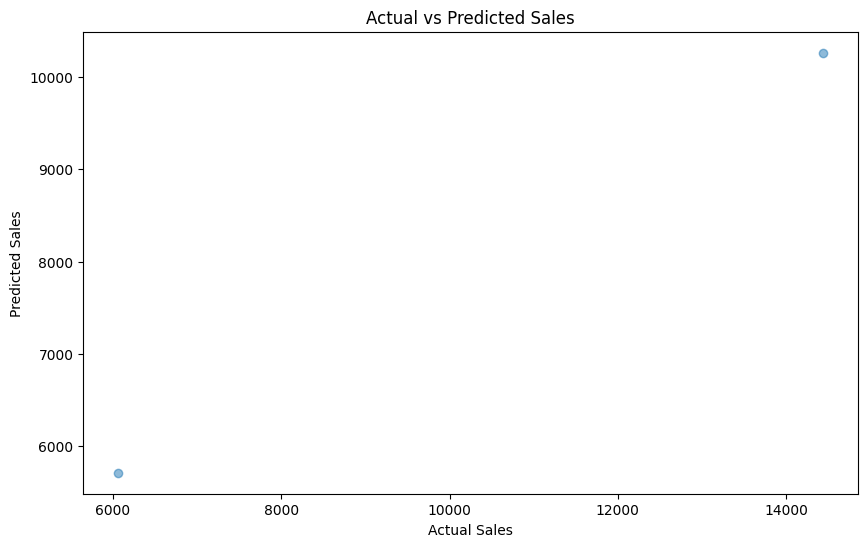

In [10]:
# Calculate Mean Squared Error and R2 Score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


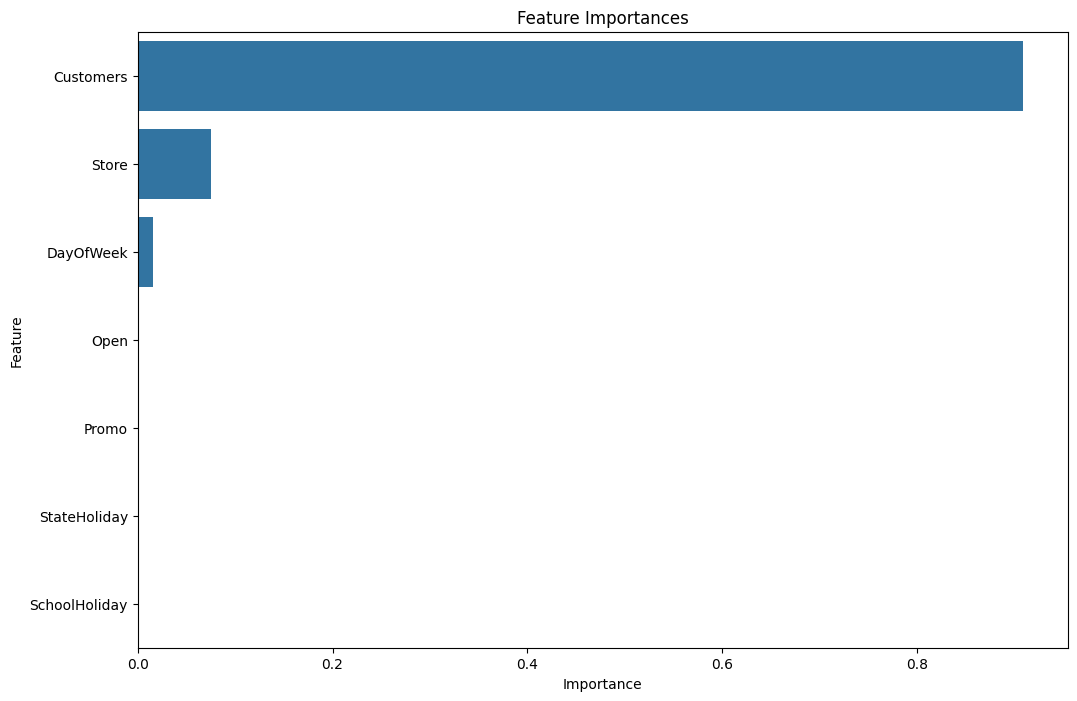

In [11]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()
